In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
from sklearn.datasets import load_digits

digits = pd.DataFrame(load_digits().data)
digits['target'] = load_digits().target

In [3]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
digits.shape

(1797, 65)

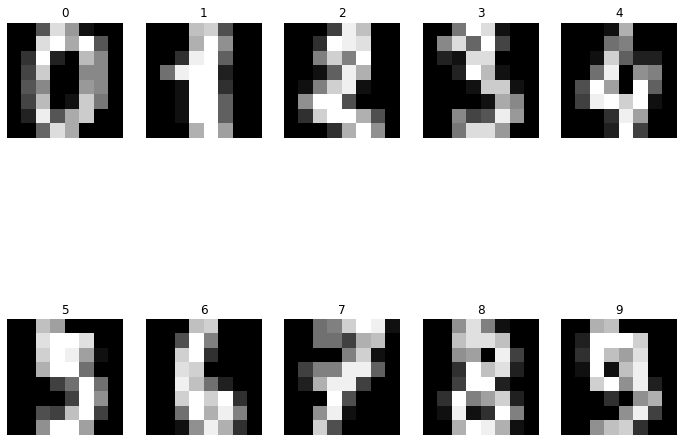

In [8]:
fig = plt.figure(figsize=(12, 10))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(load_digits().data[i].reshape(8, 8), cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')

In [9]:
X = digits.drop('target', axis=1)
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
clf = LogisticRegression(solver='saga', multi_class='multinomial', random_state=42, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [14]:
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 score: 0.97


In [12]:
pred_df = pd.DataFrame(dict(
    y_test=y_test,
    y_pred=y_pred
))

In [13]:
pd.crosstab(pred_df['y_test'], pred_df['y_pred'])

y_pred,0,1,2,3,4,5,6,7,8,9
y_test,,,,,,,,,,
0,33,0,0,0,0,0,0,0,0,0
1,0,28,0,0,0,0,0,0,0,0
2,0,0,33,0,0,0,0,0,0,0
3,0,0,0,33,0,1,0,0,0,0
4,0,1,0,0,45,0,0,0,0,0
5,0,0,1,0,0,44,1,0,0,1
6,0,0,0,0,0,1,34,0,0,0
7,0,0,0,0,0,1,0,33,0,0
8,0,0,0,0,0,1,0,0,29,0


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42, n_init=500, max_iter=4000)

In [16]:
clusters = kmeans.fit_predict(X)

In [17]:
kmeans.cluster_centers_.shape

(10, 64)

In [18]:
clusters.shape

(1797,)

In [19]:
X_new = kmeans.transform(X)
X_new.shape

(1797, 10)

In [20]:
print(f'Dimensions reduced from {X.shape[1]} to {X_new.shape[1]}')

Dimensions reduced from 64 to 10


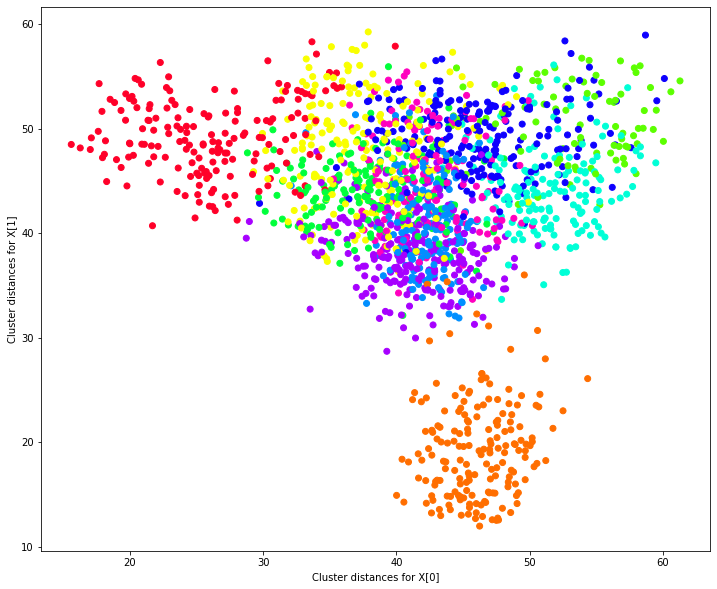

In [21]:
plt.figure(figsize=(12, 10))
plt.scatter(X_new[:, 0], X_new[:, 1], c=clusters, cmap='gist_rainbow')

plt.xlabel('Cluster distances for X[0]')
plt.ylabel('Cluster distances for X[1]');

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [23]:
clf = LogisticRegression(solver='saga', multi_class='multinomial', random_state=42, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [24]:
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred, average="weighted"):.2f}')

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 score: 0.92


In [25]:
pred_df = pd.DataFrame(dict(
    y_test=y_test,
    y_pred=y_pred
))
pd.crosstab(pred_df['y_test'], pred_df['y_pred'])

y_pred,0,1,2,3,4,5,6,7,8,9
y_test,,,,,,,,,,
0,32,0,1,0,0,0,0,0,0,0
1,0,21,2,0,0,0,0,0,3,2
2,0,1,32,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,1,0
4,0,0,0,0,45,0,1,0,0,0
5,0,0,0,0,0,44,1,0,0,2
6,1,0,0,0,0,0,34,0,0,0
7,0,0,0,0,0,0,0,32,1,1
8,0,3,0,0,0,1,0,1,22,3
